In [17]:
import torch_geometric.explain as ex

In [18]:
import torch
from graph_class_gnn import Graph_Classification_GCN
model = Graph_Classification_GCN()
model.load_state_dict(torch.load('model/pgexp_model_red_ratio.pt'))


<All keys matched successfully>

In [19]:
explainer = ex.Explainer(
        model=model,
        algorithm=ex.PGExplainer(epochs=30, lr=0.003),
        explanation_type='phenomenon',
        edge_mask_type='object',
        model_config=ex.ModelConfig(mode="multiclass_classification", task_level="graph", return_type="raw"),
    )

In [20]:
datasetLoader = torch.load('model/pgexp_test_loader_red_ratio.pt')


In [21]:
dataset = datasetLoader.dataset


In [22]:
len(dataset)

8000

In [23]:

for epoch in range(30):
    #print epochs
    print('Epoch:', epoch)
    for i in range(len(dataset)):
        explainer.algorithm.train(model=model,x=dataset[i].x, edge_index=dataset[i].edge_index,target=dataset[i].y, epoch=epoch)

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29


In [33]:
expl1 =explainer(dataset[4].x,dataset[4].edge_index, target=dataset[4].y)

NameError: name 'expl1' is not defined

tensor([[0, 0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 4],
        [0, 1, 2, 0, 4, 0, 3, 3, 4, 2, 3, 4]])
tensor([[1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.]])
Explanation(edge_mask=[12], target=[1], x=[5, 3], edge_index=[2, 12])


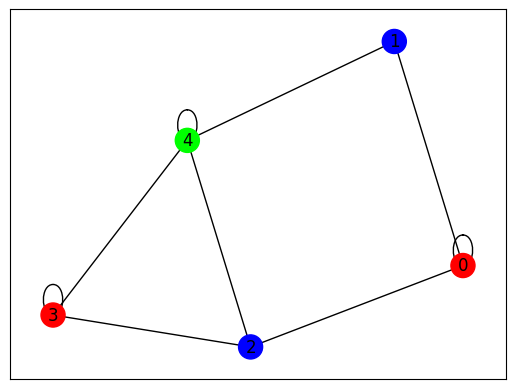

In [39]:
print(expl1.edge_index)
print(expl1.x)
print(expl1)
import utility_functions as uf
uf.printGraph(expl1)

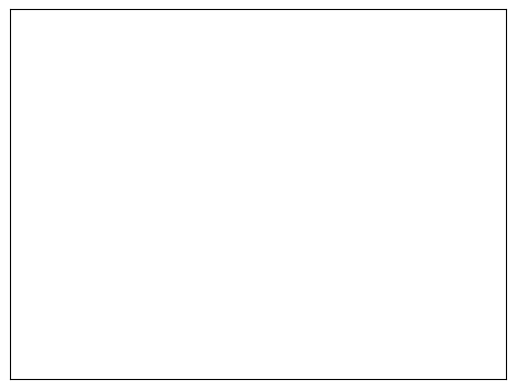